<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [11]:
import pandas as pd

Load the dataset into a dataframe.


In [12]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


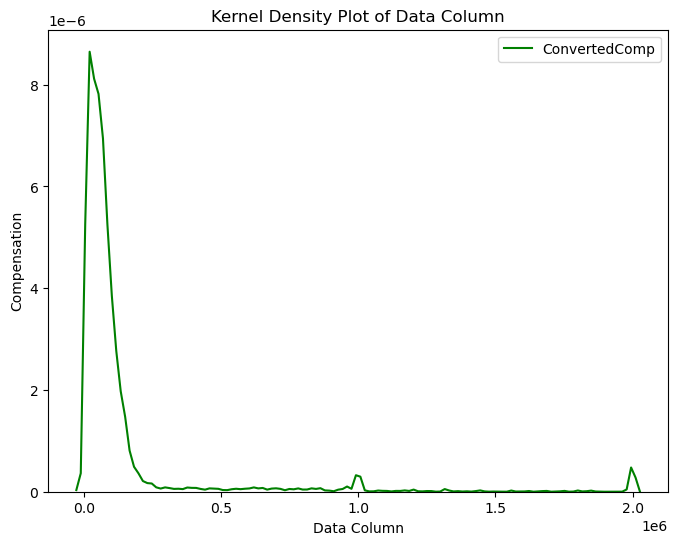

In [62]:
# your code goes here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(df['ConvertedComp'], color='green')
plt.xlabel('Data Column')
plt.ylabel('Compensation')
plt.title('Kernel Density Plot of Data Column')
plt.show()



Plot the histogram for the column `ConvertedComp`.


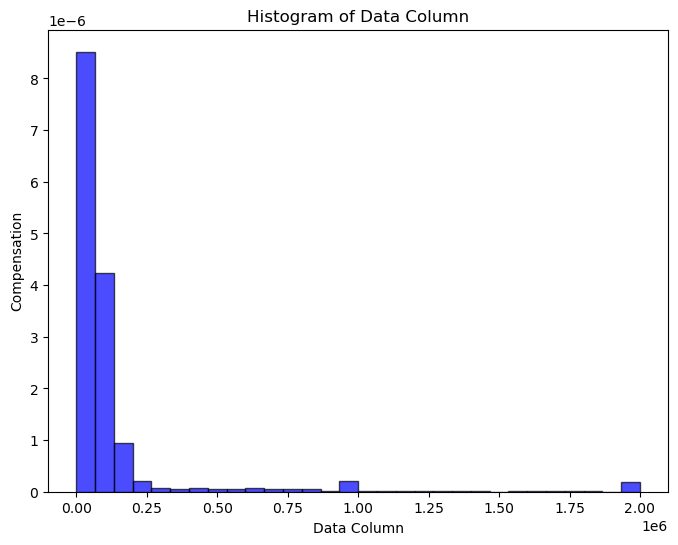

In [ ]:
# your code goes here

plt.figure(figsize=(8, 6))
plt.hist(df['ConvertedComp'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Data Column')
plt.ylabel('Compensation')
plt.title('Histogram of Data Column')
plt.show()

What is the median of the column `ConvertedComp`?


In [61]:
# your code goes here
df["ConvertedComp"].median()



57745.0

How many responders identified themselves only as a **Man**?


In [29]:
# your code goes here
df
df_Man = df[df["Gender"] == "Man"]
df_Man["Gender"].count()


10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [60]:
# your code goes here

df_wom = df[df["Gender"] == "Woman"]
df_wom["ConvertedComp"].median()


57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


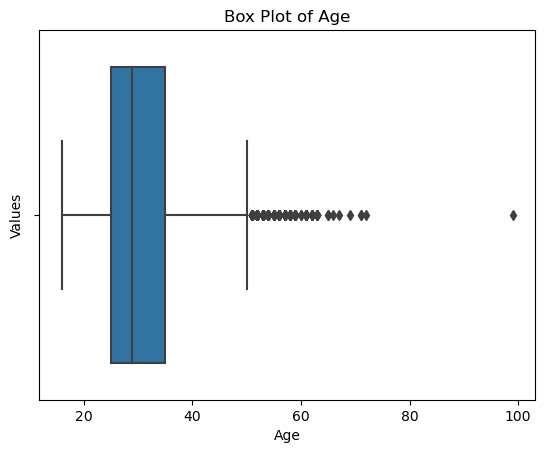

In [40]:
# your code goes here
sns.boxplot(x=df["Age"])

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Values")
plt.title("Box Plot of Age")

# Show the plot
plt.show()

Plot a histogram of the column `Age`.


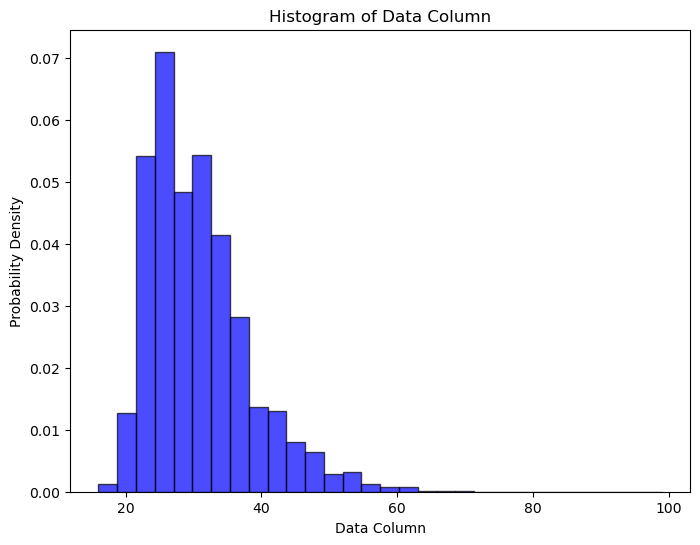

In [37]:
# your code goes here

plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Data Column')
plt.ylabel('Probability Density')
plt.title('Histogram of Data Column')
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


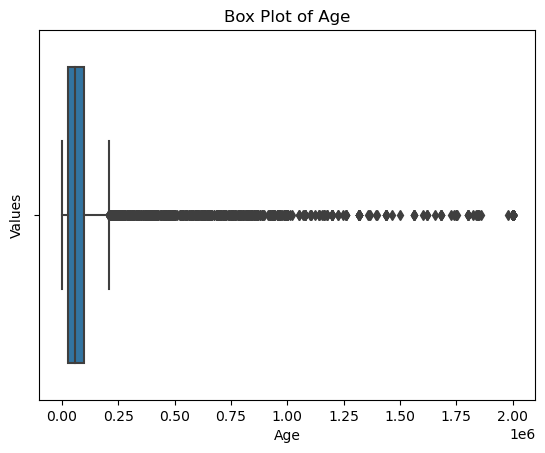

In [42]:
# your code goes here
# your code goes here
sns.boxplot(x=df["ConvertedComp"])

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Values")
plt.title("Box Plot of Age")

# Show the plot
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [44]:
# your code goes here
q1 = df["ConvertedComp"].quantile(0.25)

# Calculate the third quartile (Q3)
q3 = df["ConvertedComp"].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)


Q1: 26868.0
Q3: 100000.0
IQR: 73132.0


Find out the upper and lower bounds.


In [45]:
# your code goes here
multiplier = 1.5
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

Upper Bound: 209698.0
Lower Bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [52]:
# your code goes here

outliers = df[(df["ConvertedComp"] > upper_bound) | (df["ConvertedComp"] < lower_bound)]




# Count the number of outliers
num_outliers["CovertedComp"] = outliers.count()

print("Number of outliers:", num_outliers)

Number of outliers: Respondent                                                 10994112
MainBranch        I am a developer by professionI am a developer...
Hobbyist          YesNoYesNoYesYesYesYesYesYesYesNoYesYesYesYesY...
OpenSourcer       NeverNeverOnce a month or more oftenNeverOnce ...
Employment        Employed full-timeEmployed full-timeEmployed f...
Country           United KingdomUnited StatesCanadaUnited States...
YearsCode         1033381417871431491968207222327620209142852081...
YearsCodePro      3220510104610172923177201113312184720364634105...
CareerSat         Very satisfiedSlightly satisfiedVery satisfied...
JobSat            Slightly satisfiedSlightly satisfiedVery satis...
JobSeek           I’m not actively looking, but I am open to new...
LastHireDate      3-4 years ago1-2 years agoMore than 4 years ag...
JobFactors        Languages, frameworks, and other technologies ...
CurrencySymbol    GBPUSDCADUSDGBPEURUSDUSDUSDSEKGBPUSDCADGBPEURU...
CurrencyDesc      Pound ster

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [54]:
# your code goes here
df_no_outliers = df[(df["Age"] >= lower_bound) & (df["Age"] <= upper_bound)]
df_no_outliers


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,Somewhat less wel

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [55]:
# your code goes here
df_no_outliers.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013423,0.001734,-0.016062,0.005294,0.004041
CompTotal,-0.013423,1.000000,0.001288,0.003327,0.006280,0.006970
ConvertedComp,0.001734,0.001288,1.000000,0.021354,-0.031719,0.105386
WorkWeekHrs,-0.016062,0.003327,0.021354,1.000000,0.029304,0.036518
CodeRevHrs,0.005294,0.006280,-0.031719,0.029304,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
